In [25]:
%load_ext autoreload
%autoreload 2

import nn_old
from graphviz import Digraph

from visualize import visualize_net, visualize_genome

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
def dupe_neuron(id, bias):
    return nn_old.NeuronGene(id, bias), nn_old.NeuronGene(id, bias + 0.1)

def dupe_synapse(n1a, n1b, n2a, n2b, id, weight, is_on):
    return nn_old.SynapseGene(id, n1a, n1b, weight, is_on), nn_old.SynapseGene(id, n2a, n2b, weight + 0.1, is_on)

def make_two_nets():
    a1, a2 = dupe_neuron(1, 0.5)
    b1, b2 = dupe_neuron(2, 0.5)
    c1, c2 = dupe_neuron(3, 0.5)
    d1, d2 = dupe_neuron(4, 0.5)
    e1, e2 = dupe_neuron(5, 0.5)
    f1, f2 = dupe_neuron(6, 0.5)
    ad1, ad2 = dupe_synapse(a1, d1, a2, d2, 1, 0.5, True)
    bd1, bd2 = dupe_synapse(b1, d1, b2, d2, 2, 0.5, True)
    cd1, cd2 = dupe_synapse(c1, d1, c2, d2, 3, 0.5, False)
    ce1, ce2 = dupe_synapse(c1, e1, c2, e2, 4, 0.5, True)
    df1, df2 = dupe_synapse(d1, f1, d2, f2, 5, 0.5, True)
    ef1, ef2 = dupe_synapse(e1, f1, e2, f2, 6, 0.5, True)
    genome1 = nn_old.NetworkGenome([a1, b1, c1], [f1], [d1, e1], [ad1, bd1, cd1, ce1, df1, ef1])
    genome2 = nn_old.NetworkGenome([a2, b2, c2], [f2], [d2, e2], [ad2, bd2, cd2, ce2, df2, ef2])
    net1 = nn_old.Network(genome1)
    net2 = nn_old.Network(genome2)
    return net1, net2

[[NeuronGene 4] Bias: 0.5, [NeuronGene 5] Bias: 0.6]


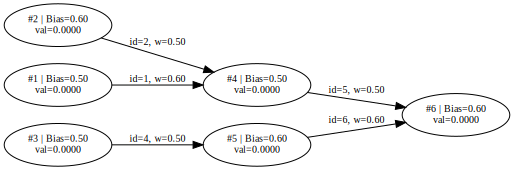

In [27]:
net1, net2 = make_two_nets()
child = nn_old.NetworkGenome.from_crossover(net2, net1)
child_net = nn_old.Network(child)
visualize_net(child_net)

In [28]:
net1

Neural Network with 6 neurons, 6 synapses

Neural Network with 5 neurons, 6 synapses


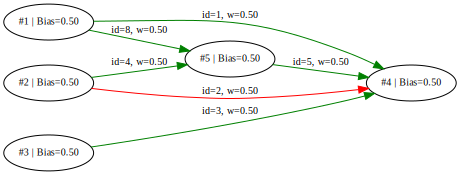

In [29]:
a = nn_old.NeuronGene(1, 0.5)
b = nn_old.NeuronGene(2, 0.5)
c = nn_old.NeuronGene(3, 0.5)
d = nn_old.NeuronGene(4, 0.5)
e = nn_old.NeuronGene(5, 0.5)

s1 = nn_old.SynapseGene(1, a, d, 0.5, True)
s2 = nn_old.SynapseGene(2, b, d, 0.5, False)
s3 = nn_old.SynapseGene(3, c, d, 0.5, True)
s4 = nn_old.SynapseGene(4, b, e, 0.5, True)
s5 = nn_old.SynapseGene(5, e, d, 0.5, True)
s8 = nn_old.SynapseGene(8, a, e, 0.5, True)

p1_g = nn_old.NetworkGenome([a, b, c], [d], [e], [s1, s2, s3, s4, s5, s8])
p1 = nn_old.Network(p1_g)
print(p1)
# visualize_net(p1, 'BT')
visualize_genome(p1_g, 'LR')

Neural Network with 6 neurons, 9 synapses


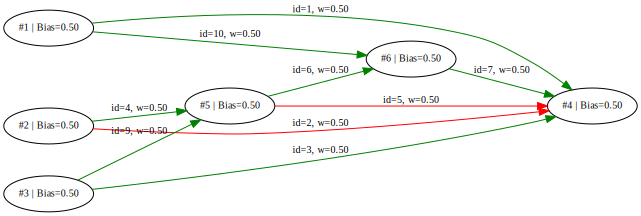

In [30]:
a = nn_old.NeuronGene(1, 0.5)
b = nn_old.NeuronGene(2, 0.5)
c = nn_old.NeuronGene(3, 0.5)
d = nn_old.NeuronGene(4, 0.5)
e = nn_old.NeuronGene(5, 0.5)
f = nn_old.NeuronGene(6, 0.5)

s1 = nn_old.SynapseGene(1, a, d, 0.5, True)
s2 = nn_old.SynapseGene(2, b, d, 0.5, False)
s3 = nn_old.SynapseGene(3, c, d, 0.5, True)
s4 = nn_old.SynapseGene(4, b, e, 0.5, True)
s5 = nn_old.SynapseGene(5, e, d, 0.5, False)
s6 = nn_old.SynapseGene(6, e, f, 0.5, True)
s7 = nn_old.SynapseGene(7, f, d, 0.5, True)
s9 = nn_old.SynapseGene(9, c, e, 0.5, True)
s10 = nn_old.SynapseGene(10, a, f, 0.5, True)

p2_g = nn_old.NetworkGenome([a, b, c], [d], [e, f], [s1, s2, s3, s4, s5, s6, s7, s9, s10])
p2 = nn_old.Network(p2_g)
print(p2)
# visualize_net(p2, orientation='BT')
visualize_genome(p2_g, orientation='LR')

[[NeuronGene 5] Bias: 0.5, [NeuronGene 6] Bias: 0.5]


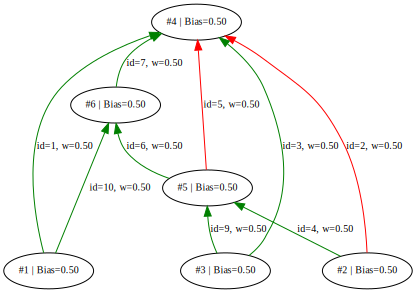

In [31]:
child = nn_old.NetworkGenome.from_crossover(p1, p2)
# child.mutate()
visualize_genome(child, 'BT')

In [32]:
child.neuron_gene

[[NeuronGene 5] Bias: 0.5, [NeuronGene 6] Bias: 0.5]

[[NeuronGene 5] Bias: 0.5, [NeuronGene 6] Bias: 0.5, [NeuronGene 4] Bias: 0.5]
3 attempts were made at creating a new synapse, but failed


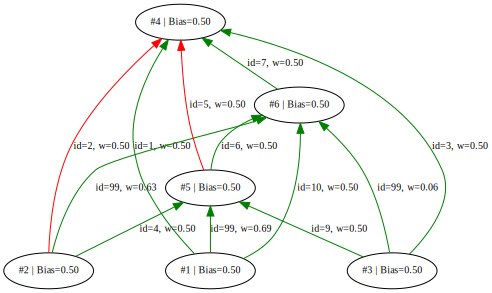

In [47]:
child.mutate()
visualize_genome(child)

In [48]:
child.top_sort(child.all_neuron_genes)

[[NeuronGene 4] Bias: 0.5,
 [NeuronGene 6] Bias: 0.5,
 [NeuronGene 5] Bias: 0.5,
 [NeuronGene 1] Bias: 0.5,
 [NeuronGene 2] Bias: 0.5,
 [NeuronGene 3] Bias: 0.5]